In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.spatial import distance

In [2]:
def pseudoInverseFunction(X):
    X = np.array(X)
    XXTranspose = np.matmul(X, X.T)
    inverse = inv(XXTranspose)
    return np.dot(X.T, inverse)

In [3]:
def gradientDescent(weights, eta, epsilon, x, Y):

    weights = np.array(weights)
    [w0, w1] = weights
    
    flag = True
    while flag:
        initialWeights = np.array(weights)
        [w0, w1] = weights
        xDerSum = 0
        yDerSum = 0
        
        for i in range(50):
            xDerSum += (2 * w0) - (2 * w1 * x[i]) - (2 * Y[i])
            yDerSum += (2 * Y[i] * x[i]) - (2 * w0) + (2 * w1 * (x[i]**2))

        gradient = np.array([xDerSum, yDerSum])
        etaMulGradient = np.multiply(eta, gradient)

        weights = np.subtract(weights, etaMulGradient)
        d = distance.euclidean(initialWeights, weights)

        if d <= epsilon:
            flag = False

    return weights

In [4]:
x = []
y = []

for i in range(1, 51):
    x.append(i)
for i in x:
    y.append(i + np.random.uniform(-1.0, 1.0))
y = np.array(y)


l = [[1 for i in range(0,50)],x]
[w0, w1] = np.matmul(y, pseudoInverseFunction(l))

Y = []
for i in range(50):
    Y.append(w0 + (w1 * x[i]))

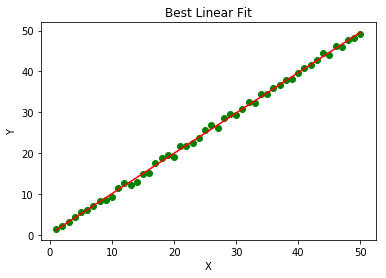

In [5]:
plt.title("Best Linear Fit")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x, y, color="green")
plt.plot(x, Y, color="red")
plt.show(True)

In [6]:
eta = 0.0000005
epsilon = 0.1
w = gradientDescent([w0, w1], eta, epsilon, x, Y)
print(w)

[0.34446532 0.89985743]


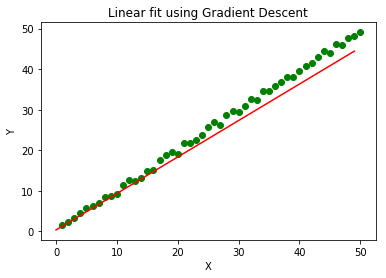

In [7]:
def plotGrad(w, x, y):
    [w0, w1] = w
    xList = []
    yList = []

    for j in range(50):
        xList.append(j)
        yGrad = w0 + (w1*j)
        yList.append(yGrad)	

    plt.ylabel("Y")
    plt.xlabel("X")
    plt.title("Linear fit using Gradient Descent")
    plt.scatter(x, y, color = 'green')
    plt.plot(xList, yList, color = "red")
    
    plt.show(True)
    
plotGrad(w, x, y)